# Task01分享 - Matplotlib初相识

学习内容：https://github.com/datawhalechina/fantastic-matplotlib

使用Matplotlib绘图最重要的就是Figure对象了，它包含了下列基本组件：
+ Figure
+ Axes
+ Axis

我们先导入matplotlib包，通过将一个绘图例子细致分解来回顾每一个函数的作用。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Figure

`Figure`对象定义了一张完整的图，包括进行实际绘图的canvas画布，也包括标题、标签等各种零散的元素。一个`Figure`可以包含任意个`Axes`对象。

可以使用`plt.figure()`来创建一张空图。

In [2]:
fig = plt.figure()      # 一张空图，什么都没有

<Figure size 432x288 with 0 Axes>

## Axes

现在我们向空图中添加一个`Axes`，通过`Figure.add_subplot()`来实现，该函数会返回新创建的`Axes`。

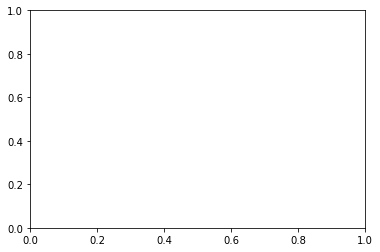

In [3]:
axes = fig.add_subplot()    # 添加一个Axes
fig                         # 可以看到这里Axes的作用是显示二维的坐标轴

接着在`Axes`坐标轴上画三条曲线。为了得到这三条曲线，需要构建对应的x坐标和y坐标。

`np.linspace()`用于创建一个线性等分向量作为x，当然也可以用`np.arange()`。

绘制曲线实际是通过密集的离散点来创造连续的视觉效果。

x点的密度越大，图像越精细。若x点的密度取得较小，看起来会像一条折线，因为matplotlib会对中间点进行线性插值。

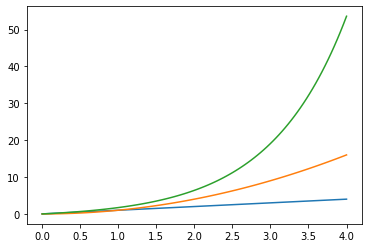

In [4]:
x = np.linspace(0, 4, 100)

axes.plot(x, x, label='$y = x$')  
axes.plot(x, x**2, label='$y = x^2$')  
axes.plot(x, 2.71828**x - 1, label='$y = e^x - 1$')

fig

可以发现，上图我们设置的labels并没有显示。

需要使用`Axes.legend()`增加图例，才能显示曲线对应的labels。

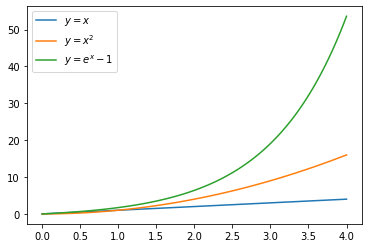

In [5]:
axes.legend()

fig     # 左上角标签被正确的显示了

为`Axes`添加坐标轴的标签和图标题。

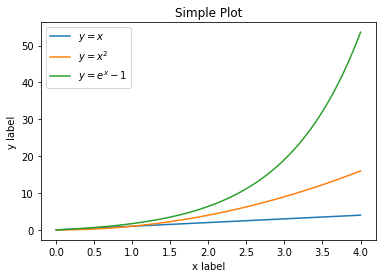

In [6]:
axes.set_xlabel('x label') 
axes.set_ylabel('y label') 
axes.set_title("Simple Plot")

fig

## Axis

默认情况下，matplotlib会自动根据图像大小设置合适的坐标轴范围。

有时我们希望精细地控制每一个坐标轴，这就需要用到`Axis`。

`Axis`是`Axes`的一部分。比如`Axes`代表的是一个由x轴和y轴组成的2D绘图，`Axis`就代表其中具体的x轴或y轴。

一般来说，我们会调用`Axes`对象的方法间接操作它的`Axis`。当然，也可以用`Axes.get_xaxis()`直接获取x轴对应的`Axis`对象进行操作。

例如，我们希望将x轴和y轴的范围缩小，从而能够更加清晰地观察曲线在x=0附近的细节。

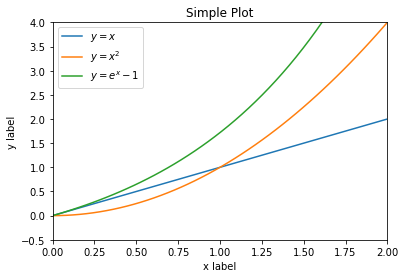

In [7]:
axes.set_xlim(0, 2)         # 设置x轴范围
axes.set_ylim(-0.5, 4)      # 设置y轴范围

fig

## 另一种实现以上绘图的方法

不显式创建`Figure`和`Axes`，使用默认的`plt.plot()`。

matplotlib会自动用默认的`Axes`给我们绘图。

(-0.5, 4.0)

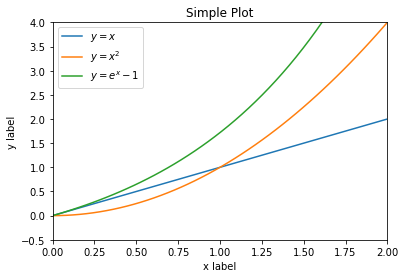

In [8]:
x = np.linspace(0, 4, 100)

plt.plot(x, x, label='$y = x$')  
plt.plot(x, x**2, label='$y = x^2$')  
plt.plot(x, 2.71828**x - 1, label='$y = e^x - 1$')

plt.legend()

plt.xlabel('x label')       # 注意Axes那里是set_xlabel，下面这些在plt使用的方法都是没有set前缀的
plt.ylabel('y label')       # set_ylabel -> ylabel
plt.title("Simple Plot")    # set_title -> title

plt.xlim(0, 2)         # set_xlim -> xlim
plt.ylim(-0.5, 4)      # set_ylim -> ylim

## 思考

现在我们学习了`Axes`的用法，在上面的例子中，我们只用到了一个`Axes`对象。

如果想同时表现函数的整体图像和在x=0处的细节，要怎么做呢？

一个很自然的想法是用两个`Axes`。一个画在左边，另一个画在右边。

让我们试一试！首先查看`plt.subplots()`的文档。

In [9]:
print(plt.subplots.__doc__[:500] + '...')


    Create a figure and a set of subplots.

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- ...


文档很长，只截取前500个字符。

我们看到第一个参数的描述是：
```
nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
```

根据含义猜想，我们要创建一行两列的网格绘图，这样就有2个`Axes`了。

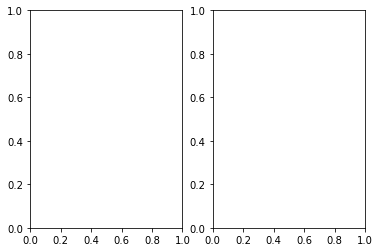

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

查看返回值`axes`，发现它是一个长度为2的数组，是我们要的两个`Axes`对象。

In [11]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

下面分别对它们进行操作，就和操作单个`Axes`一样。

我们定义一个函数以复用公共绘图的部分。

In [12]:
def draw(axes, title, xlim=None, ylim=None):
    x = np.linspace(0, 4, 100)

    axes.plot(x, x, label='$y = x$')  
    axes.plot(x, x**2, label='$y = x^2$')  
    axes.plot(x, 2.71828**x - 1, label='$y = e^x - 1$')

    axes.legend()

    axes.set_xlabel('x label') 
    axes.set_ylabel('y label') 
    axes.set_title(title)

    if xlim is not None:
        axes.set_xlim(*xlim)
    if ylim is not None:
        axes.set_ylim(*ylim)

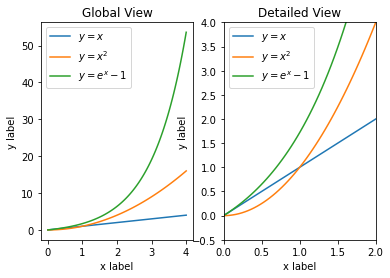

In [13]:
draw(axes[0], 'Global View')

draw(axes[1], 'Detailed View', xlim=(0, 2), ylim=(-0.5, 4))

fig

可以看到，我们成功绘制了两个子图。

但是，图像的大小不太美观，需要调整到更宽才好。

`Figure.get_figwidth()`可以查看目前图像的宽度，接着通过`.set_figwidth()`把宽度调整到这个值的两倍。

In [14]:
fig.get_figwidth()

6.0

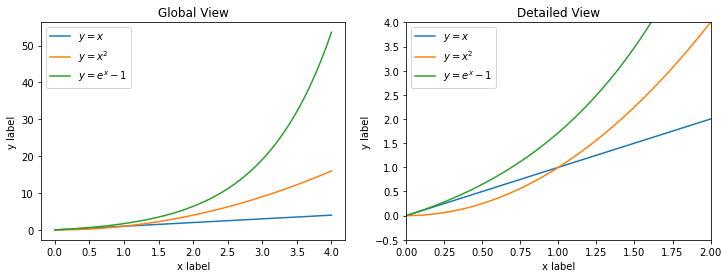

In [15]:
fig.set_figwidth(6.0 * 2)
fig

## 作业

你在工作或学习中通常何时会用到数据可视化，希望通过可视化达到什么目的？

答：在学习数学时，我们可以用matplotlib对感兴趣的函数图像进行绘制，从而达到更好的理解。实际应用中，将结构化的数据通过可视化形式展现，容易分析出数据的变化趋势，也可以通过可视化手段观察数据中是否有异常点。可视化技术也可以用于深度学习的模型训练中，通过将中间层的激活值或梯度可视化，我们可以了解网络的训练进程，从而解释网络的行为。